In [177]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
import requests
import io
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
%matplotlib inline
from sklearn import tree

In [178]:
#Importing dataset

In [179]:
df = pd.read_csv("loan_prediction.csv")

# eda

In [180]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [181]:
df.shape # check the data dimension

(614, 13)

In [182]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [184]:
df.columns # check the column names for EDA

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [185]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [186]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in same column
df['Loan_ID'] = labelencoder.fit_transform(df['Loan_ID'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Married'] = labelencoder.fit_transform(df['Married'])

df['Education'] = labelencoder.fit_transform(df['Education'])
df['Self_Employed'] = labelencoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'])

df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [187]:
df['Loan_Status'].nunique() #check the number of unique values in Attrition column post label encoding

2

In [188]:
#Dropping the columns which are not required
df = df.drop(labels = 'Married', axis = 1)

In [189]:
df = df.drop(labels = 'Education', axis = 1)

In [190]:
df = df.drop(labels = 'Dependents', axis = 1)

In [191]:
df = df.drop(labels = 'Self_Employed', axis = 1)

In [192]:
df.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,6000,0.0,141.0,360.0,1.0,2,1


## handle null values

In [193]:
df.isna().sum() #checked for null values

Loan_ID               0
Gender                0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [194]:
#   Null values present in Dependents, LoanAmount, Loan_Amount_Term, Credit_History columns

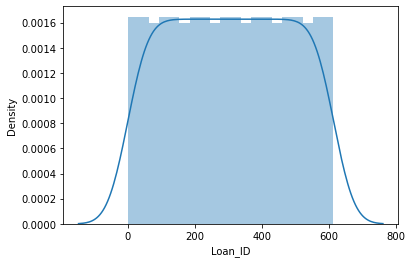

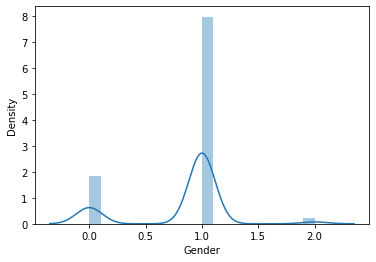

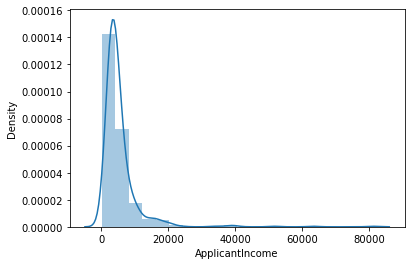

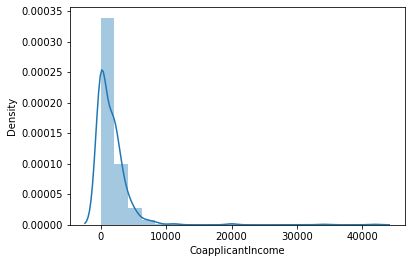

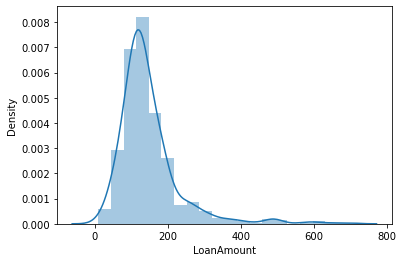

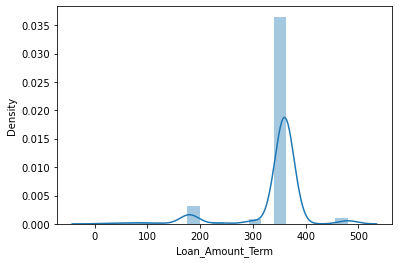

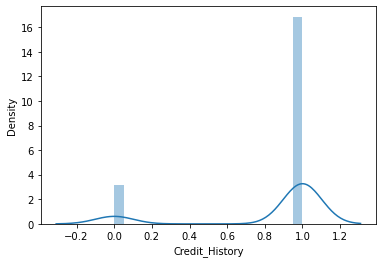

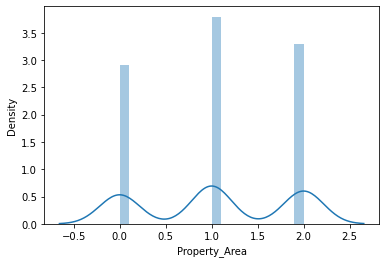

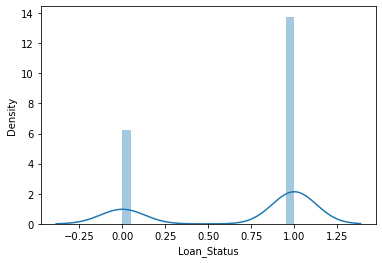

In [195]:
for i in df.columns: 
    sns.distplot(df[i],kde=True,bins=20)
    plt.show()

In [196]:
#data is not normally distributed, hence replacing null values with median
df['Loan_Status'] = df['Loan_Status'].fillna(value=df['Loan_Status'].median())

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

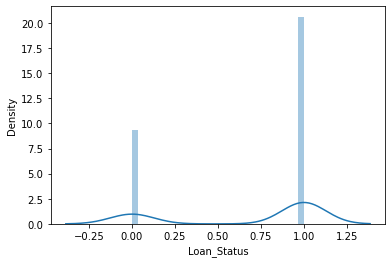

In [197]:
sns.distplot(df['Loan_Status'],kde=True,bins=30)

In [198]:
df = df.rename(columns={'Loan_Status': 'Target'})

In [199]:
df.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
0,0,1,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,6000,0.0,141.0,360.0,1.0,2,1


In [200]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [201]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## check for outliers

In [202]:
#remove outliers before skewness check and before x, y split

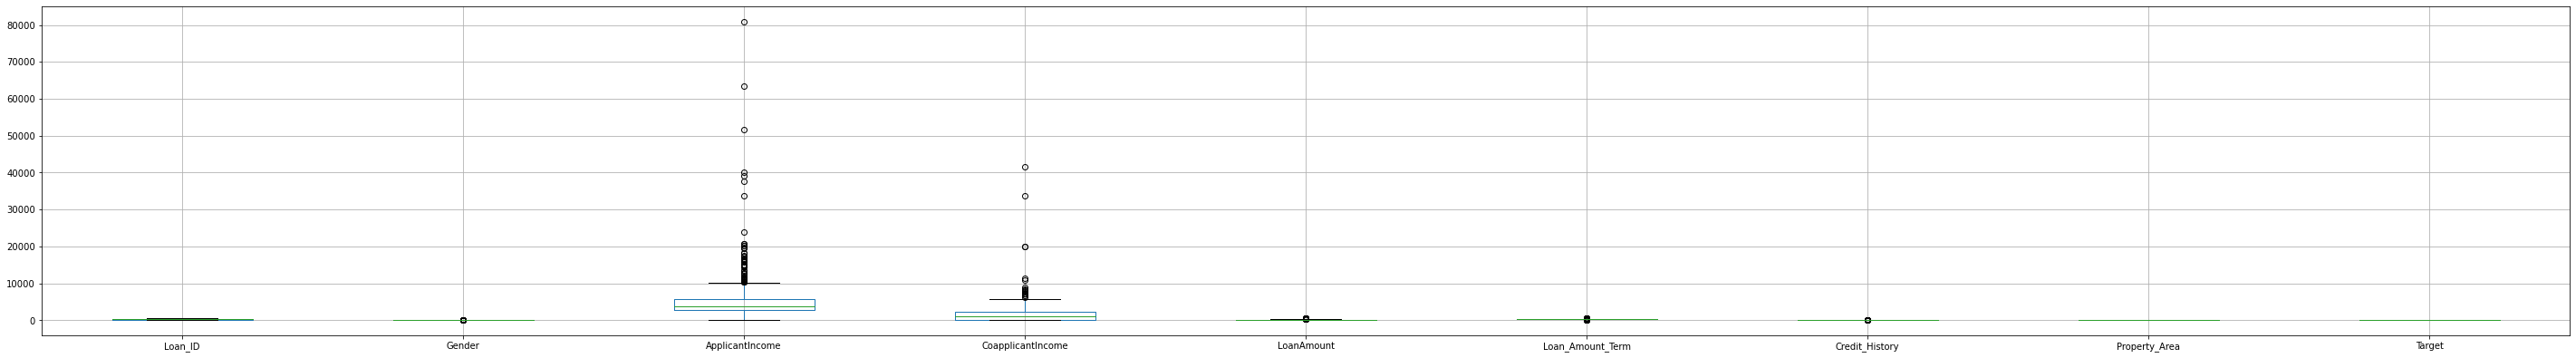

In [203]:
df.boxplot(figsize=[50,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [204]:
#Removing outliers by z score

In [205]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [206]:
new_df.shape

(0, 9)

In [207]:
df.shape

(614, 9)

In [212]:
dataloss = ((614-0)/9)*100

In [213]:
dataloss

6822.222222222223

In [163]:
#Outliers are not removed since data loss is less than 7%.

In [214]:
df= new_df

## check co-relation

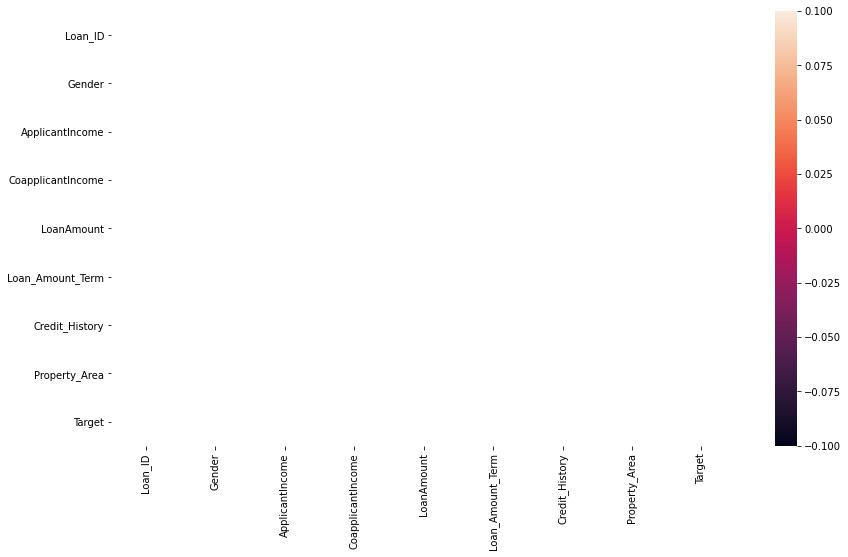

In [215]:
plt.figure(figsize=[14,8])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [216]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [217]:
cor["Target"].sort_values(ascending=False)

Loan_ID             NaN
Gender              NaN
ApplicantIncome     NaN
CoapplicantIncome   NaN
LoanAmount          NaN
Loan_Amount_Term    NaN
Credit_History      NaN
Property_Area       NaN
Target              NaN
Name: Target, dtype: float64

In [218]:
df.columns

Index(['Loan_ID', 'Gender', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Target'],
      dtype='object')

In [219]:
columns = ['Loan_ID', 'Gender', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Target']

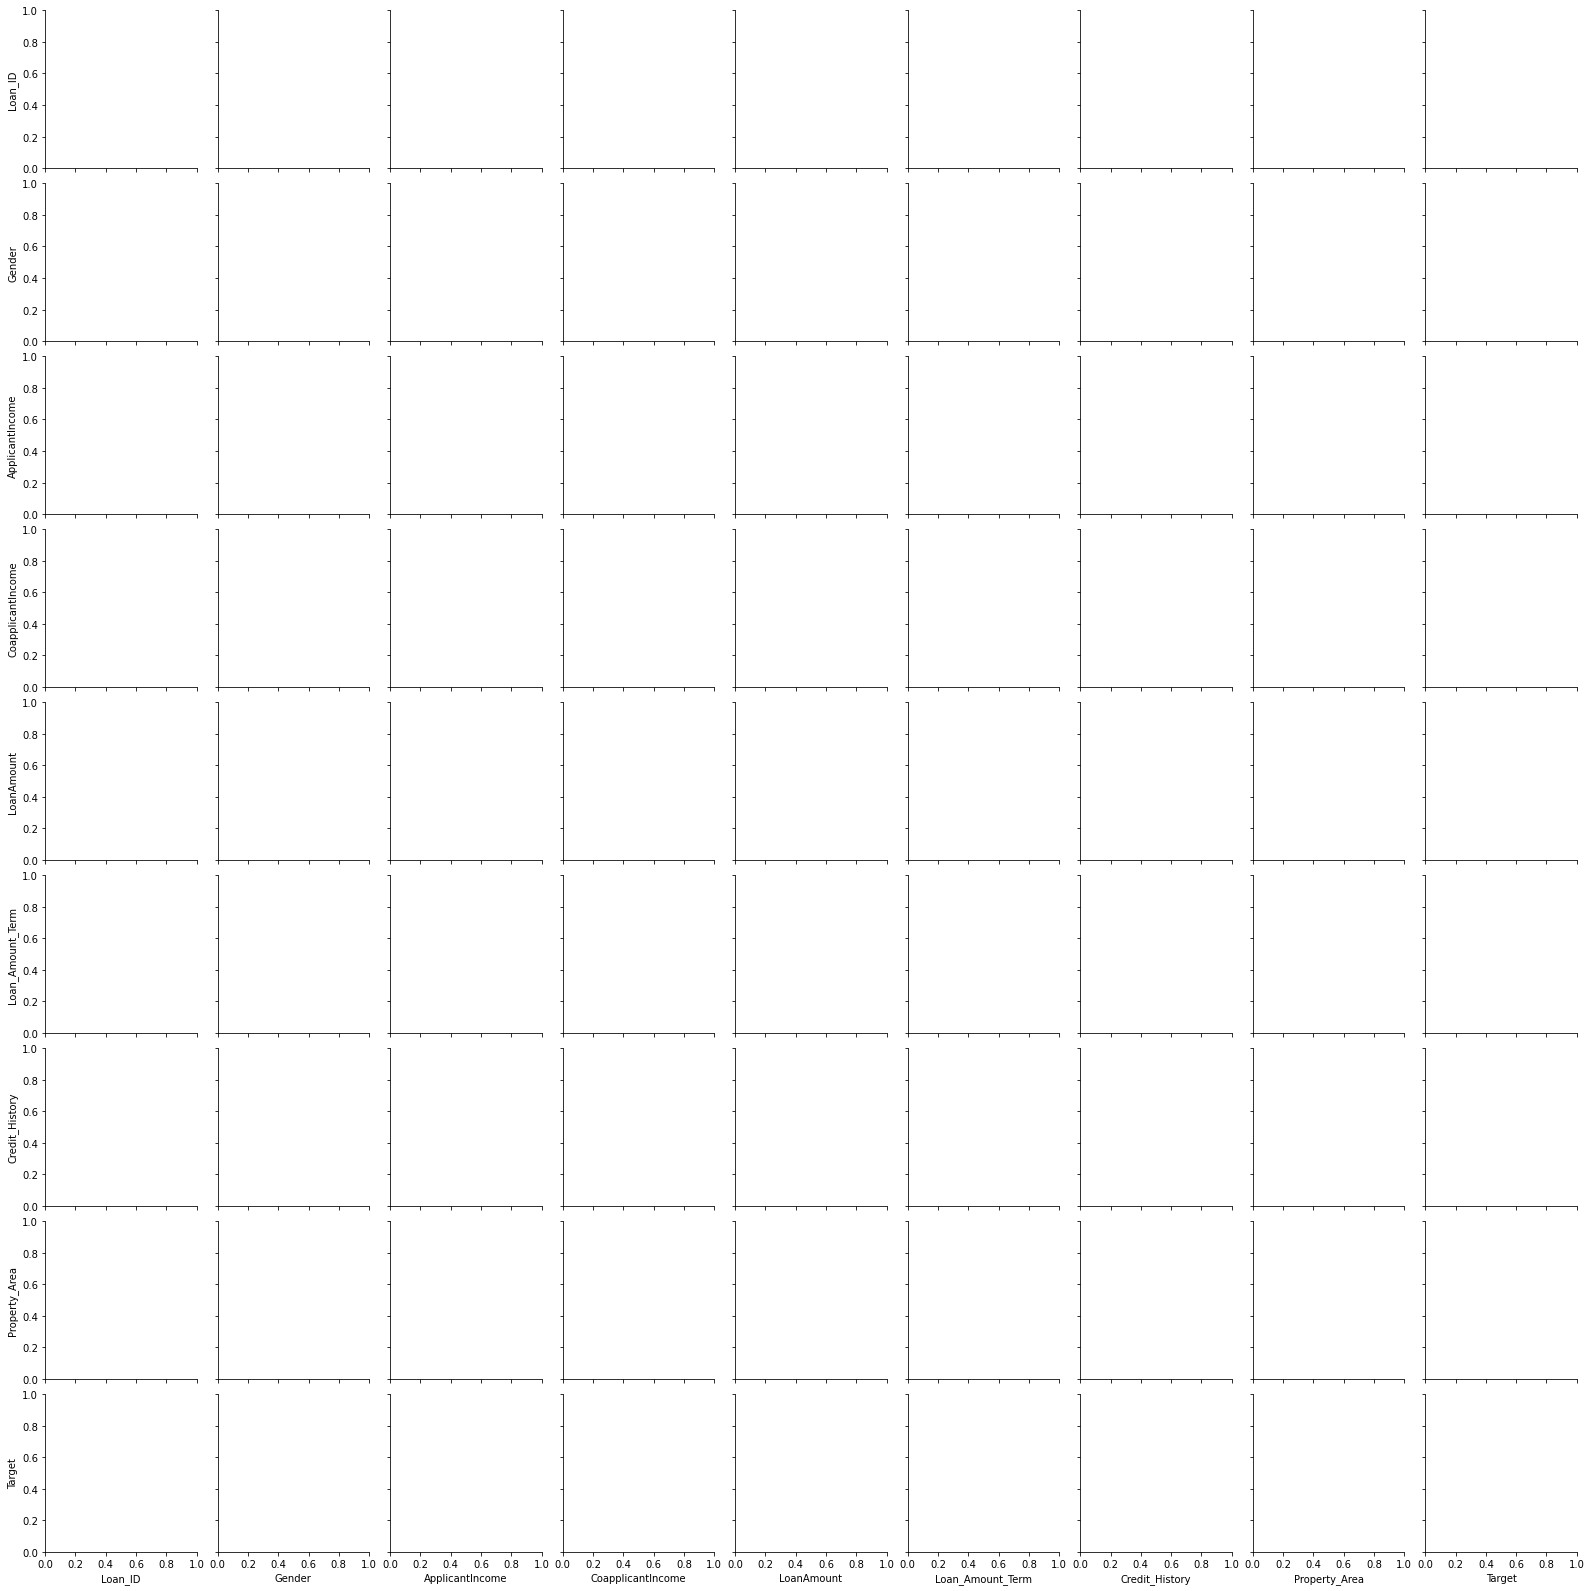

In [220]:
sns.pairplot(df[columns])

## check for skewness

In [221]:
x = df.drop('Target',axis=1)
y = df['Target']

In [222]:
x.skew() # check skewness

Loan_ID             NaN
Gender              NaN
ApplicantIncome     NaN
CoapplicantIncome   NaN
LoanAmount          NaN
Loan_Amount_Term    NaN
Credit_History      NaN
Property_Area       NaN
dtype: float64

## find best random state

In [224]:
#for classification problems

In [225]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test, predLR)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [53]:
#We have found the best random state as 30. We will create our train_test_split using this random state.

## test train split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

## handle data imbalance

<AxesSubplot:xlabel='target', ylabel='count'>

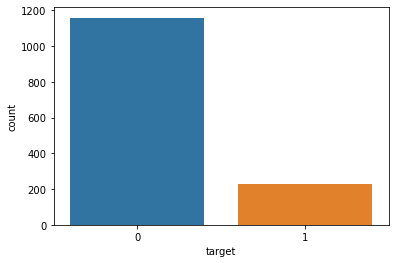

In [55]:
sns.countplot(df['target'])

In [56]:
y.value_counts()

0    1158
1     229
Name: target, dtype: int64

### classification 

In [57]:
#logistic_regression

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8800959232613909
[[361   2]
 [ 48   6]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       363
           1       0.75      0.11      0.19        54

    accuracy                           0.88       417
   macro avg       0.82      0.55      0.56       417
weighted avg       0.87      0.88      0.84       417



In [59]:
#support vector machines

In [60]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8705035971223022
[[363   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       363
           1       0.00      0.00      0.00        54

    accuracy                           0.87       417
   macro avg       0.44      0.50      0.47       417
weighted avg       0.76      0.87      0.81       417



In [61]:
#decisiontree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.8081534772182254
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       363
           1       0.30      0.37      0.33        54

    accuracy                           0.81       417
   macro avg       0.60      0.62      0.61       417
weighted avg       0.83      0.81      0.82       417

[[317  46]
 [ 34  20]]


In [63]:
#random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

0.882494004796163
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       363
           1       0.65      0.20      0.31        54

    accuracy                           0.88       417
   macro avg       0.77      0.59      0.62       417
weighted avg       0.86      0.88      0.85       417

[[357   6]
 [ 43  11]]


## check cross-validation scores

In [65]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("CrossValidation Score of LogisticRegression Model: ", scr.mean())

CrossValidation Score of LogisticRegression Model:  0.8392203204945069


In [66]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("CrossValidation Score of DecisionTree Model: ", scr.mean())

CrossValidation Score of DecisionTree Model:  0.7685842661610783


In [67]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("CrossValidation Score of RandomForest Model: ", scr.mean())

CrossValidation Score of RandomForest Model:  0.8529127600446719


In [68]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc, x, y, cv=5)
print("CrossValidation Score of SVC Model: ", scr.mean())

CrossValidation Score of SVC Model:  0.8348959821312626


Model with least difference between Model accuracy and cross validation is selected as the best model

In [69]:
#LR -> 
88 - 83

5

In [70]:
# SVM -> 
87 - 83 

4

In [71]:
# DT -> 
80 - 76

4

In [72]:
# RF -> 
88  - 85 

3

## hyper parameter tuning

In [73]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[361   2]
 [ 46   8]]
0.8848920863309353
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       363
           1       0.80      0.15      0.25        54

    accuracy                           0.88       417
   macro avg       0.84      0.57      0.59       417
weighted avg       0.88      0.88      0.85       417



In [83]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [96]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [97]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [98]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [99]:
best_random_grid=rf_randomcv.best_estimator_

In [100]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[360   3]
 [ 45   9]]
Accuracy Score 0.8848920863309353
Classification report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       363
           1       0.75      0.17      0.27        54

    accuracy                           0.88       417
   macro avg       0.82      0.58      0.61       417
weighted avg       0.87      0.88      0.85       417



## Grid Search CV

In [101]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1000, 1100, 1200, 1300, 1400]}


In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## saving the model

In [ ]:
import joblib
joblib.dump(best_grid, "model.pkl") #rename as per project name
prediction = model.predict(x_test)

## loading the saved model

In [ ]:
model = joblib.load("model.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,prediction)*100)

In [ ]:
prediction = pd.DataFrame(prediction) # converting into dataframe

In [ ]:
prediction.to_csv("Results.csv")